## Calculate alignemnt between SGS Stress and Strain Rate

In [5]:
import numpy as np
from scipy.io import loadmat

from py2d.SGSterms import Tau
from py2d.convert import Omega2Psi
from py2d.filter import filter2D
from py2d.apriori_analysis import angle_Tau_strainRate
from py2d.util import eig_vec_2D
from py2d.initialize import initialize_wavenumbers_rfft2

### Example calculation of Eigen Vector and Eigen Value

In [6]:
# Example usage:
S11 = np.array([[1, 2], [3, 4]])
S12 = np.array([[2, 3], [4, 5]])
S22 = np.array([[3, 4], [5, 6]])

eigVec1, eigVec2, eigVal1, eigVal2 = eig_vec_2D(S11, S12, S12, S22)

print("Eigenvectors 1:", eigVec1)
print("Eigenvectors 2:", eigVec2)
print("Eigenvalues 1:", eigVal1)
print("Eigenvalues 2:", eigVal2)


Eigenvectors 1: [[-0.52573111 -0.85065081]
 [-0.58471028 -0.81124219]
 [-0.61541221 -0.78820544]
 [-0.63398891 -0.77334214]]
Eigenvectors 2: [[-0.85065081  0.52573111]
 [-0.81124219  0.58471028]
 [-0.78820544  0.61541221]
 [-0.77334214  0.63398891]]
Eigenvalues 1: [ 4.23606798  6.16227766  8.12310563 10.09901951]
Eigenvalues 2: [-0.23606798 -0.16227766 -0.12310563 -0.09901951]


### Example calculating angles between SGS stress and strain rate

In [7]:


filterType = 'gaussian'
coarseGrainType = 'spectral'

Ngrid = [128, 128]
Lx, Ly = 2*np.pi, 2*np.pi

Delta = 2*Lx/Ngrid[0]

nx, ny = Ngrid[0], Ngrid[1]
Kx, Ky,  Kabs, Ksq, invKsq = initialize_wavenumbers_rfft2(nx, ny, Lx, Ly)

filename = '../data/ICs/NX2048/1.mat'
data = loadmat(filename)

Omega_DNS = data['Omega']

Tau11, Tau12, Tau22 = Tau(Omega_DNS, filterType=filterType, coarseGrainType=coarseGrainType, Delta=Delta, N_LES=Ngrid)
Omega = filter2D(Omega_DNS, filterType=filterType, coarseGrainType=coarseGrainType, Delta=Delta, Ngrid=Ngrid)
Psi = Omega2Psi(Omega, invKsq)

angle, angle_eigVec1, angle_eigVec2 = angle_Tau_strainRate(Tau11, Tau12, Tau22, Psi, anisotropic=False, dealias=False)


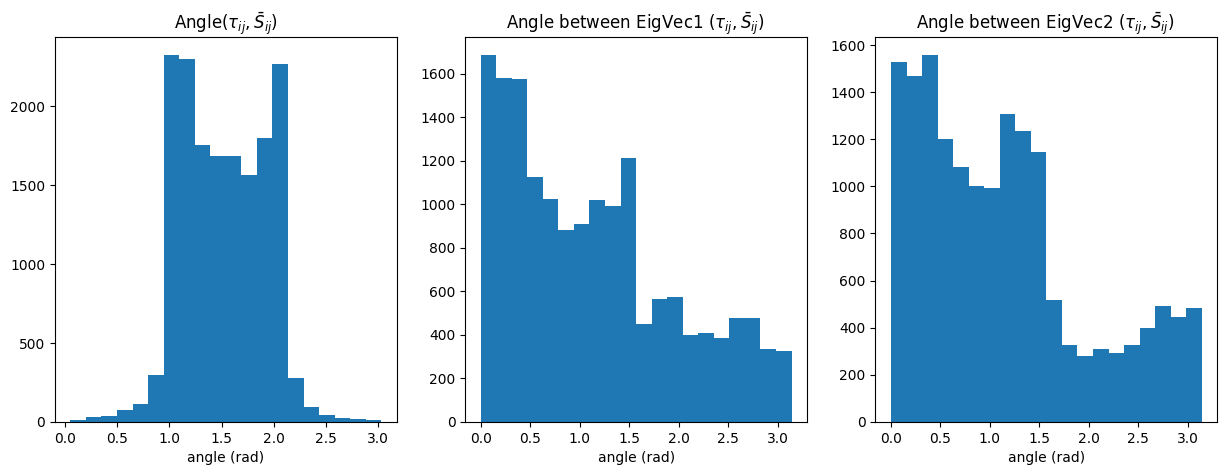

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

bins = 20

# Plot the histogram
axs[0].hist(angle.flatten(), bins=bins)
axs[0].set_title(r'Angle($\tau_{ij}, \bar{S}_{ij}$)')
axs[0].set_xlabel(r'angle (rad)')

axs[1].hist(angle_eigVec1, bins=bins)
axs[1].set_title(r'Angle between EigVec1 ($\tau_{ij}, \bar{S}_{ij}$) ')
axs[1].set_xlabel(r'angle (rad)')

axs[2].hist(angle_eigVec2, bins=bins)
axs[2].set_title(r'Angle between EigVec2 ($\tau_{ij}, \bar{S}_{ij}$) ')
axs[2].set_xlabel(r'angle (rad)')

plt.show()

In [9]:
print(np.mean(angle))
print(np.mean(angle_eigVec1))
print(np.mean(angle_eigVec2))

1.5210018940126493
1.1336793541628696
1.1311304267681572
